In [21]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from feature import FeatureExtraction
from sklearn.model_selection import train_test_split


In [22]:

data = pd.read_csv("phishing.csv")
data.head()

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1


In [23]:
data.shape

(22109, 31)

In [24]:
data.columns

Index(['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22109 entries, 0 to 22108
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   UsingIP              22109 non-null  int64
 1   LongURL              22109 non-null  int64
 2   ShortURL             22109 non-null  int64
 3   Symbol@              22109 non-null  int64
 4   Redirecting//        22109 non-null  int64
 5   PrefixSuffix-        22109 non-null  int64
 6   SubDomains           22109 non-null  int64
 7   HTTPS                22109 non-null  int64
 8   DomainRegLen         22109 non-null  int64
 9   Favicon              22109 non-null  int64
 10  NonStdPort           22109 non-null  int64
 11  HTTPSDomainURL       22109 non-null  int64
 12  RequestURL           22109 non-null  int64
 13  AnchorURL            22109 non-null  int64
 14  LinksInScriptTags    22109 non-null  int64
 15  ServerFormHandler    22109 non-null  int64
 16  InfoEmail            2

In [26]:
data.nunique()

UsingIP                2
LongURL                3
ShortURL               2
Symbol@                2
Redirecting//          2
PrefixSuffix-          2
SubDomains             3
HTTPS                  3
DomainRegLen           2
Favicon                2
NonStdPort             2
HTTPSDomainURL         2
RequestURL             2
AnchorURL              3
LinksInScriptTags      3
ServerFormHandler      3
InfoEmail              2
AbnormalURL            2
WebsiteForwarding      2
StatusBarCust          2
DisableRightClick      2
UsingPopupWindow       2
IframeRedirection      2
AgeofDomain            2
DNSRecording           2
WebsiteTraffic         3
PageRank               2
GoogleIndex            2
LinksPointingToPage    3
StatsReport            2
class                  2
dtype: int64

In [27]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
UsingIP,22109.0,0.313854,0.949493,-1.0,-1.0,1.0,1.0,1.0
LongURL,22109.0,-0.633272,0.766017,-1.0,-1.0,-1.0,-1.0,1.0
ShortURL,22109.0,0.738749,0.673996,-1.0,1.0,1.0,1.0,1.0
Symbol@,22109.0,0.700574,0.713595,-1.0,1.0,1.0,1.0,1.0
Redirecting//,22109.0,0.741553,0.670909,-1.0,1.0,1.0,1.0,1.0
PrefixSuffix-,22109.0,-0.734950,0.678137,-1.0,-1.0,-1.0,-1.0,1.0
SubDomains,22109.0,0.064001,0.817487,-1.0,-1.0,0.0,1.0,1.0
HTTPS,22109.0,0.250984,0.911854,-1.0,-1.0,1.0,1.0,1.0
DomainRegLen,22109.0,-0.336741,0.941619,-1.0,-1.0,-1.0,1.0,1.0
Favicon,22109.0,0.628568,0.777773,-1.0,1.0,1.0,1.0,1.0


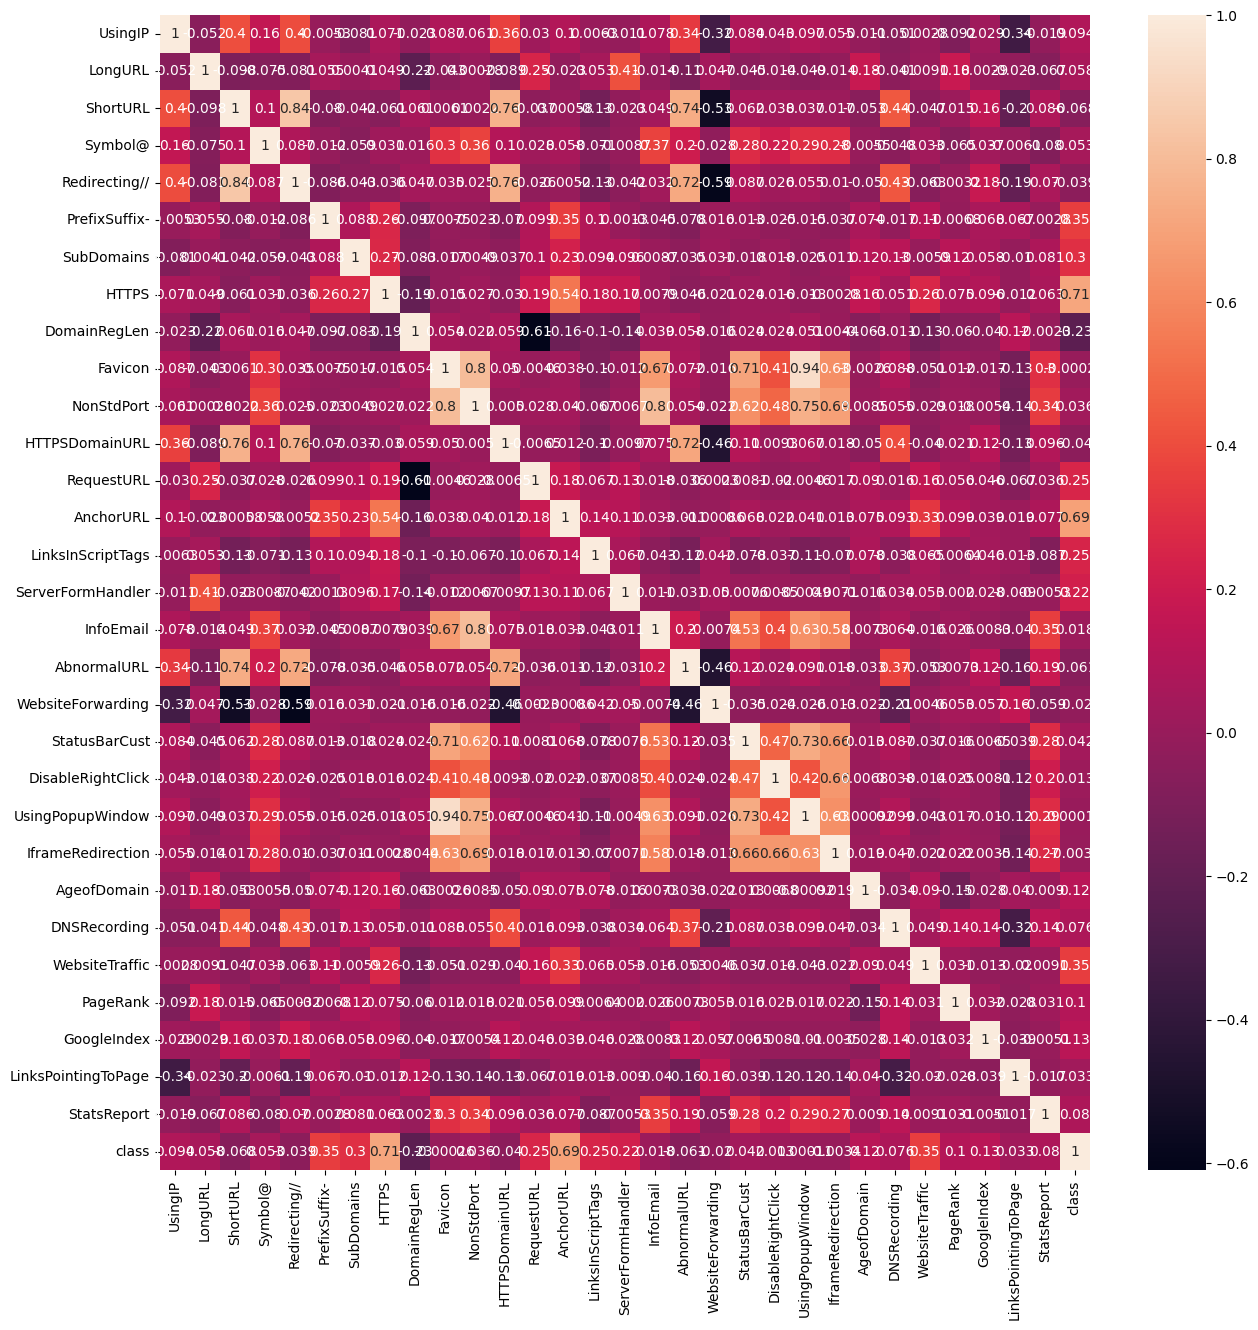

In [28]:

plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [29]:
# df = data[['PrefixSuffix-', 'SubDomains', 'HTTPS','AnchorURL','WebsiteTraffic','class']]
# sns.pairplot(data = df,hue="class",corner=True)

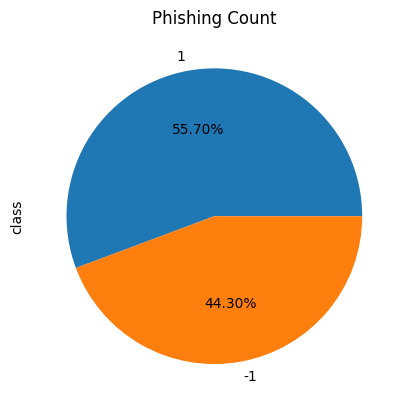

In [30]:
data['class'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

In [31]:
X = data.drop(["class"],axis =1)
y = data["class"]

In [32]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((17687, 30), (17687,), (4422, 30), (4422,))

In [33]:
# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [34]:
#predicting the target value from the model for the samples
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

In [35]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))

Gradient Boosting Classifier : Accuracy on training Data: 0.988
Gradient Boosting Classifier : Accuracy on test Data: 0.979

Gradient Boosting Classifier : f1_score on training Data: 0.989
Gradient Boosting Classifier : f1_score on test Data: 0.982

Gradient Boosting Classifier : Recall on training Data: 0.992
Gradient Boosting Classifier : Recall on test Data: 0.987

Gradient Boosting Classifier : precision on training Data: 0.986
Gradient Boosting Classifier : precision on test Data: 0.977


In [36]:
print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

          -1       0.98      0.97      0.98      1926
           1       0.98      0.99      0.98      2496

    accuracy                           0.98      4422
   macro avg       0.98      0.98      0.98      4422
weighted avg       0.98      0.98      0.98      4422



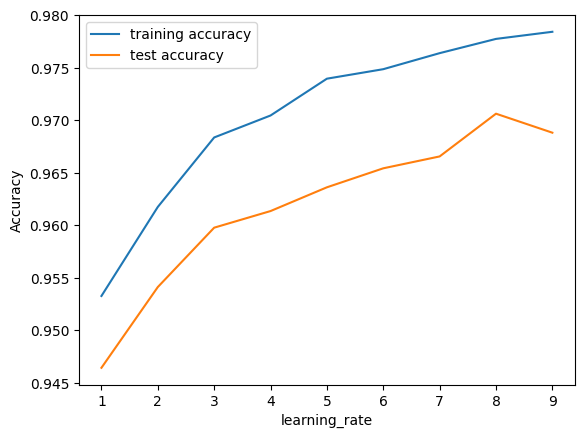

In [37]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  GradientBoostingClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend()

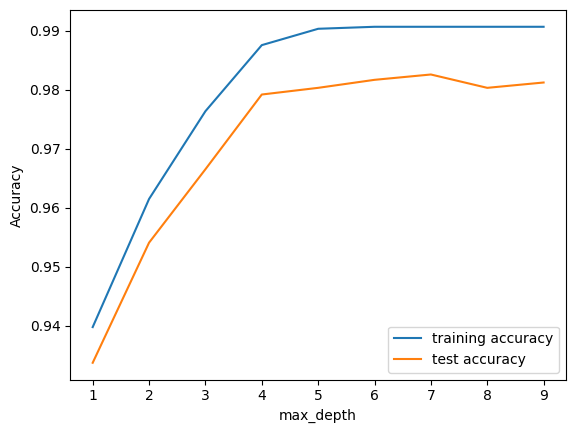

In [38]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10,1)
for n in depth:
    forest_test =  GradientBoostingClassifier(max_depth=n,learning_rate = 0.7)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend()
def storeResults(classifier, accuracy, f1_score, recall_score, precision_score):
    # Your implementation to store results, e.g., print or save to a file/database
    print(f"Classifier: {classifier}")
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1_score}")
    print(f"Recall Score: {recall_score}")
    print(f"Precision Score: {precision_score}")



In [39]:
storeResults('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc)

Classifier: Gradient Boosting Classifier
Accuracy: 0.979194934418815
F1 Score: 0.9816660023913909
Recall Score: 0.9921572621715217
Precision Score: 0.985532173209227


In [40]:
from joblib import dump

dump(gbc, 'phishing_model.joblib')

['phishing_model.joblib']